In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('bankloans.csv')
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


#Data Preprocessing

In [3]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [4]:
df.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [5]:
df2 = df.dropna()
df2

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


#Balancing Data Using Oversampling Minority Class Method

C:\Users\25472\anaconda3\envs\base2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    517
1.0    183
Name: default, dtype: int64


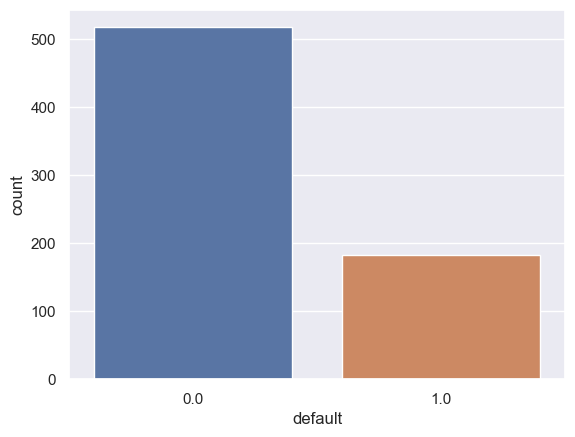

In [6]:
sns.countplot(df2['default'])
print(df2.default.value_counts())

C:\Users\25472\anaconda3\envs\base2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.0    517
0.0    517
Name: default, dtype: int64


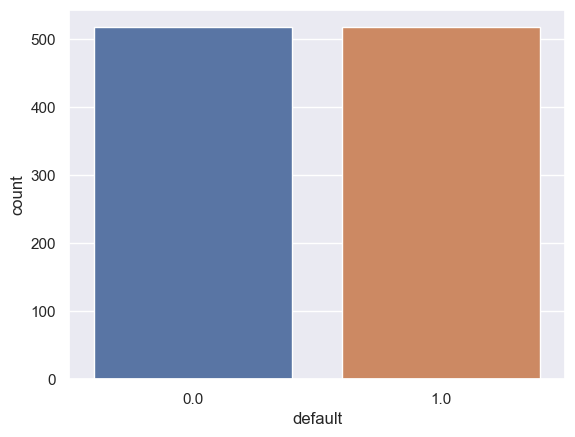

In [7]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df2[(df2['default']==0)] 
df_minority = df2[(df2['default']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 517, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

sns.countplot(df_upsampled['default'])
print(df_upsampled.default.value_counts())

#Check the Outlier using Boxplot

In [42]:
df_upsampled.skew()

age         0.455117
ed          1.077532
employ      1.083756
address     0.996819
income      4.052958
debtinc     0.858031
creddebt    3.453769
othdebt     2.780396
default     0.000000
dtype: float64

In [43]:
df_upsampled.kurtosis()

age         -0.482685
ed           0.433033
employ       0.916333
address      0.452098
income      27.267344
debtinc      0.548937
creddebt    15.050470
othdebt     10.168279
default     -2.003880
dtype: float64

<AxesSubplot:xlabel='age'>

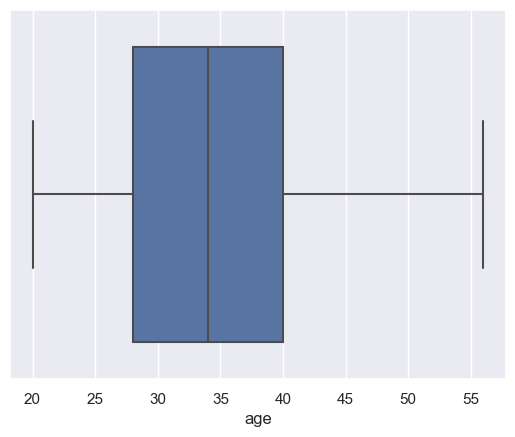

In [8]:
sns.boxplot(x=df_upsampled["age"])

<AxesSubplot:xlabel='employ'>

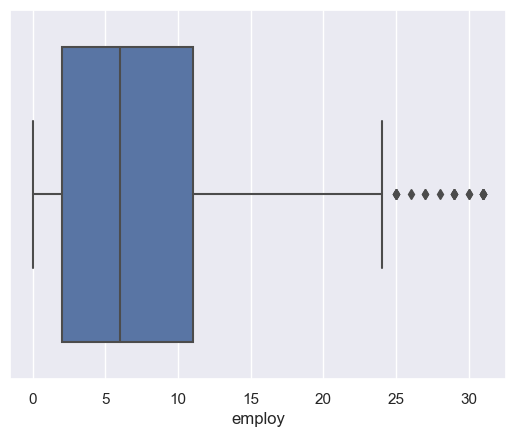

In [9]:
sns.boxplot(x=df_upsampled["employ"])

<AxesSubplot:xlabel='address'>

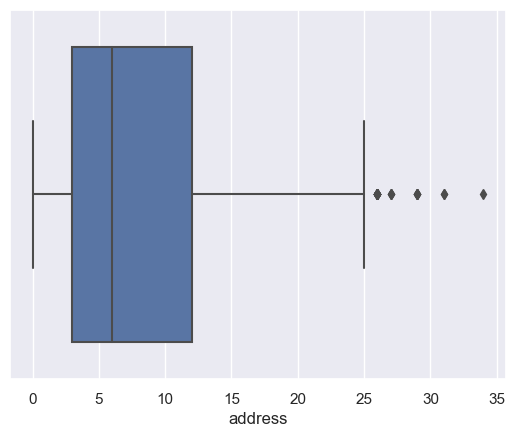

In [10]:
sns.boxplot(x=df_upsampled["address"])

<AxesSubplot:xlabel='income'>

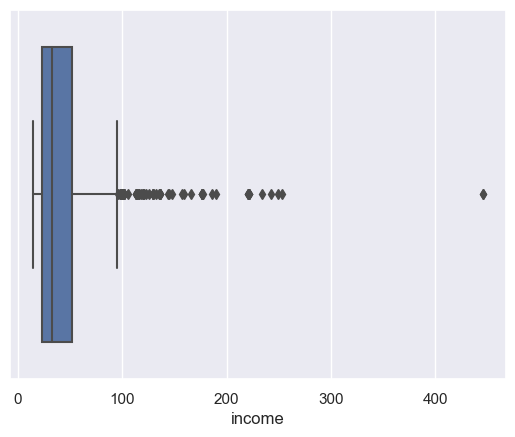

In [11]:
sns.boxplot(x=df_upsampled["income"])

<AxesSubplot:xlabel='debtinc'>

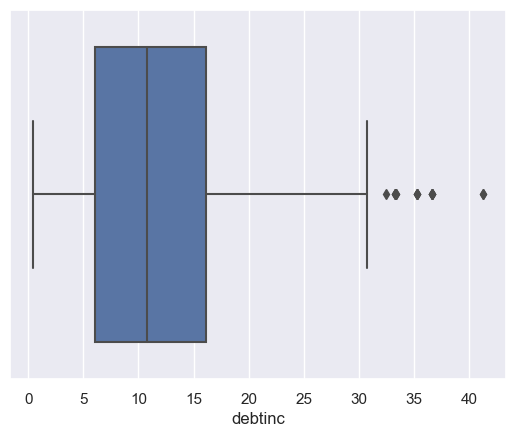

In [12]:
sns.boxplot(x=df_upsampled["debtinc"])

<AxesSubplot:xlabel='creddebt'>

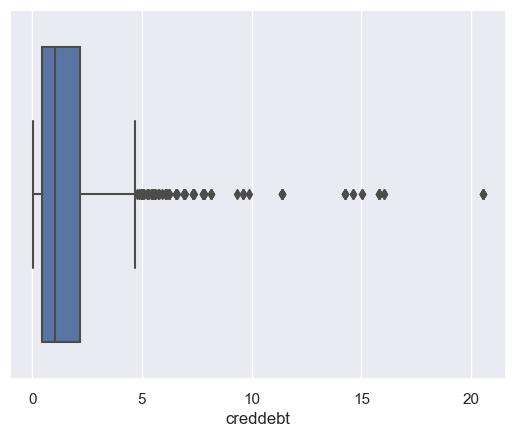

In [13]:
sns.boxplot(x=df_upsampled["creddebt"])

<AxesSubplot:xlabel='othdebt'>

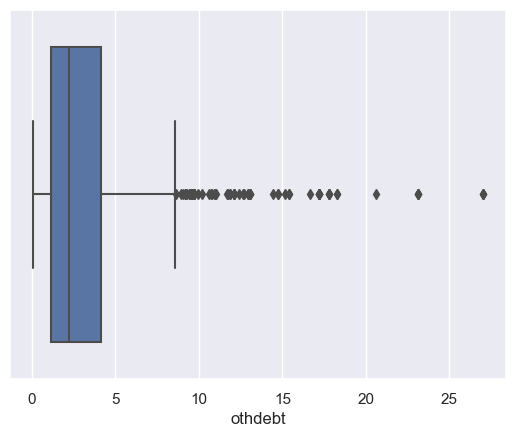

In [14]:
sns.boxplot(x=df_upsampled["othdebt"])

#Remove the Outlier using Z-Score

In [15]:
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis = 1)] 
data_clean.shape

(965, 9)

#Data Correlation

<AxesSubplot:>

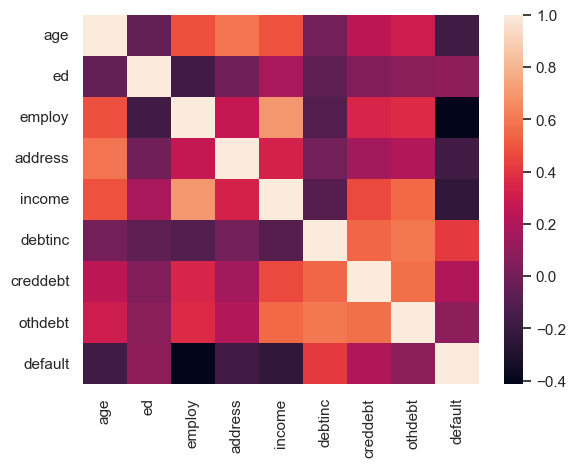

In [16]:
sns.heatmap(data_clean.corr(), fmt='.2g')

#Correlation between Class and other attributes

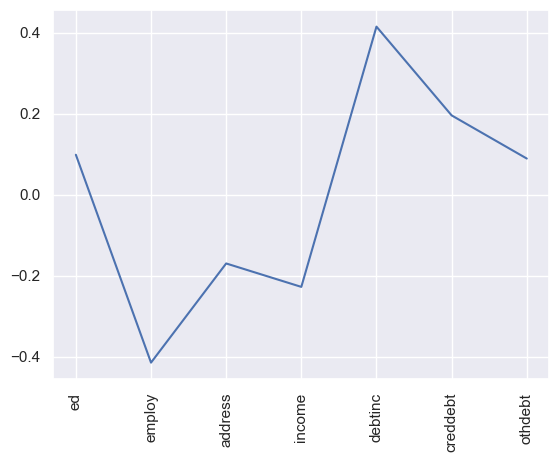

In [17]:
corr = data_clean[data_clean.columns[1:]].corr()['default'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

#Drop Duplicates

In [18]:
data_clean2 = data_clean.drop_duplicates()
data_clean2.shape

(662, 9)

#Exploratory Data Analysis

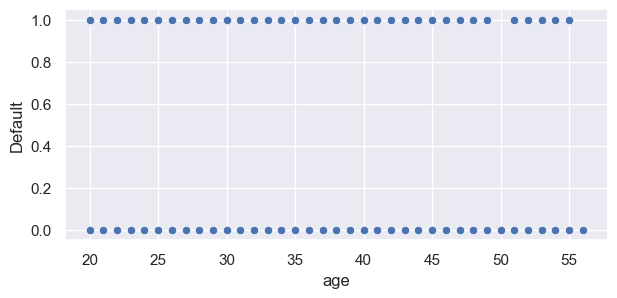

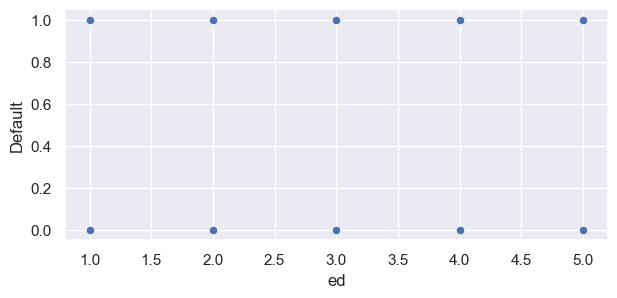

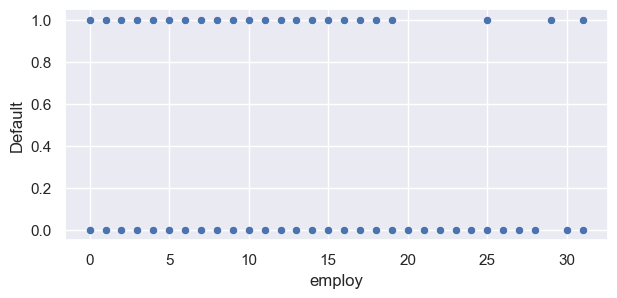

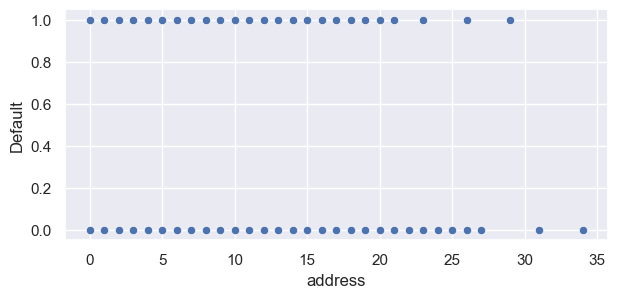

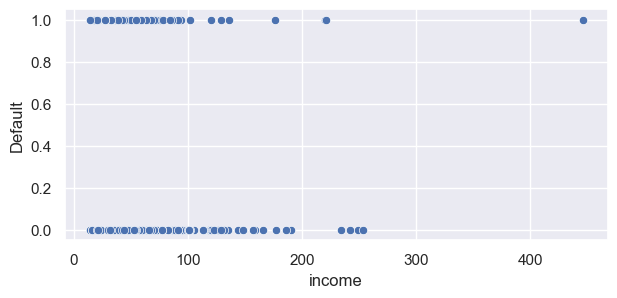

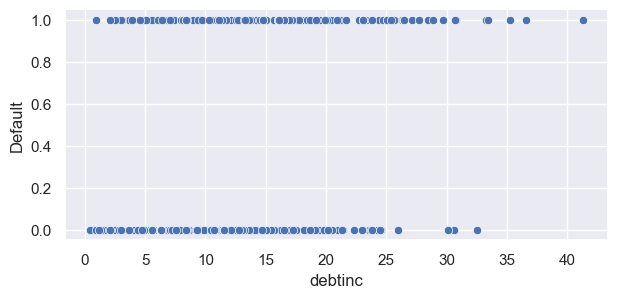

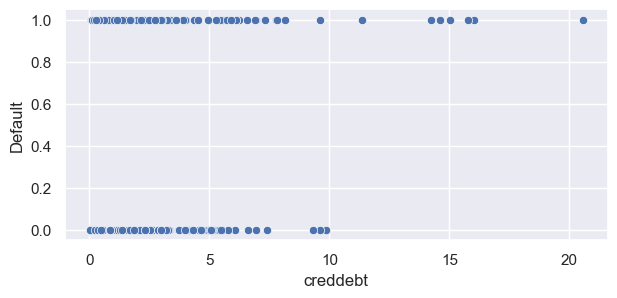

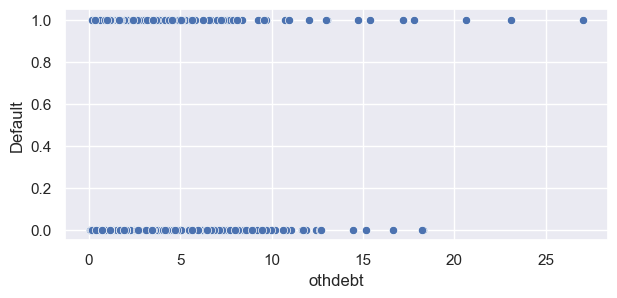

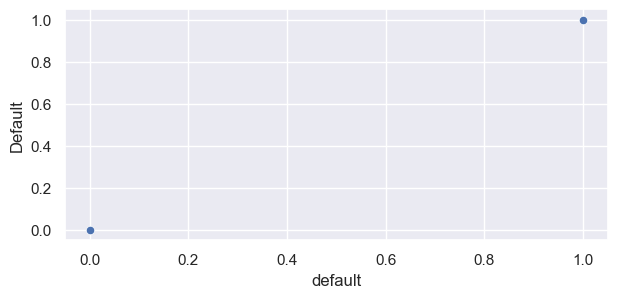

In [19]:
def create_scatterplot(data_clean2, column):
    f, axe = plt.subplots(figsize=(7,3))
    sns.scatterplot(x=data_clean2[column], y=data_clean2['default'], data=data_clean2)
    axe.set(xlabel = column, ylabel = 'Default')
for column in df.columns:
    create_scatterplot(df, column)

<AxesSubplot:xlabel='age', ylabel='Count'>

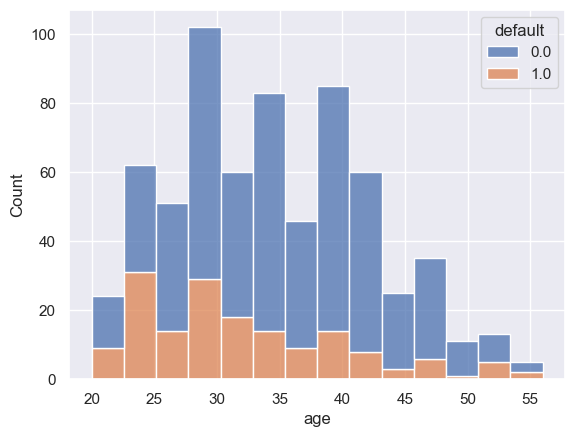

In [20]:
sns.histplot(data=data_clean2, x="age", hue="default", multiple="stack")

<AxesSubplot:xlabel='ed', ylabel='Count'>

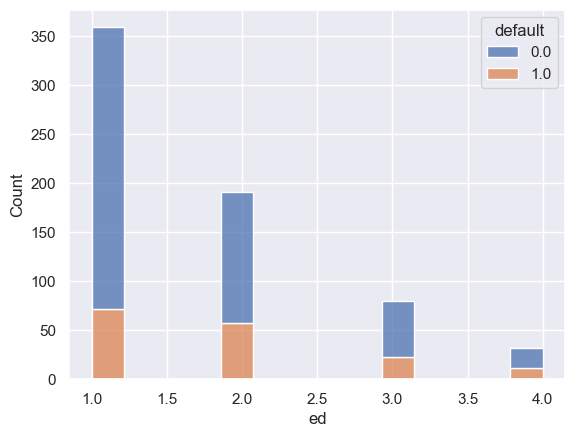

In [21]:
sns.histplot(data=data_clean2, x="ed", hue="default", multiple="stack")

<AxesSubplot:xlabel='employ', ylabel='Count'>

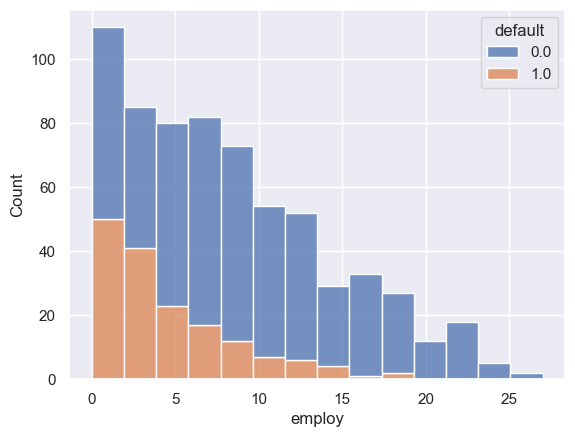

In [22]:
sns.histplot(data=data_clean2, x="employ", hue="default", multiple="stack")

<AxesSubplot:xlabel='address', ylabel='Count'>

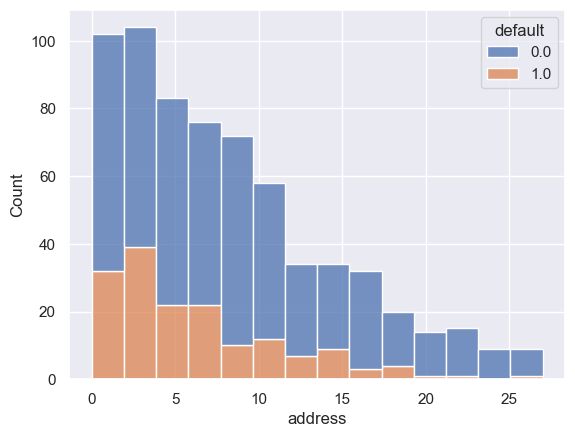

In [23]:
sns.histplot(data=data_clean2, x="address", hue="default", multiple="stack")

<AxesSubplot:xlabel='income', ylabel='Count'>

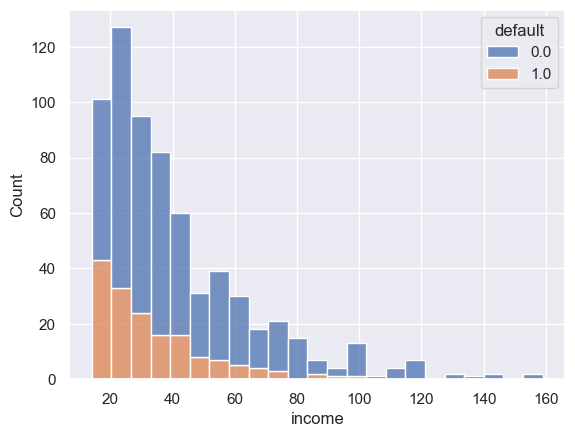

In [24]:
sns.histplot(data=data_clean2, x="income", hue="default", multiple="stack")

<AxesSubplot:xlabel='debtinc', ylabel='Count'>

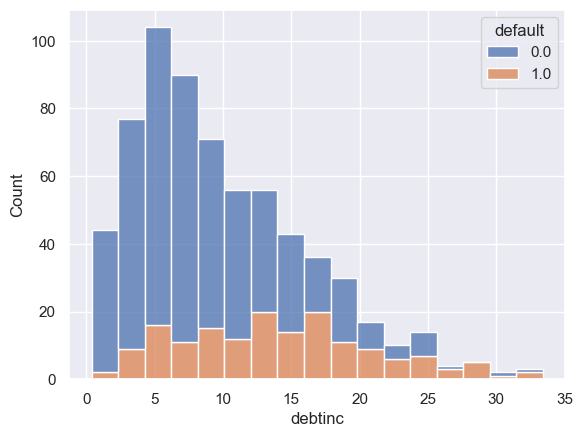

In [25]:
sns.histplot(data=data_clean2, x="debtinc", hue="default", multiple="stack")

<AxesSubplot:xlabel='creddebt', ylabel='Count'>

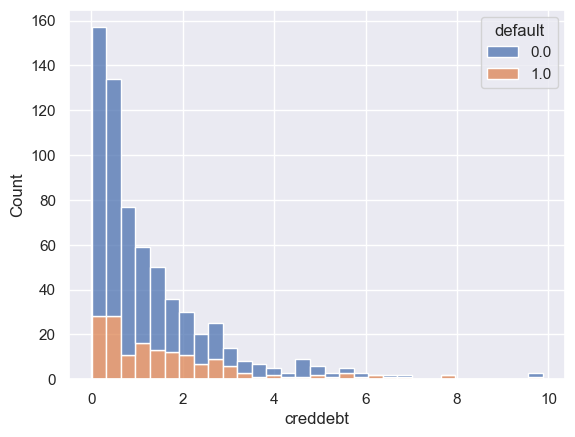

In [26]:
sns.histplot(data=data_clean2, x="creddebt", hue="default", multiple="stack")

<AxesSubplot:xlabel='othdebt', ylabel='Count'>

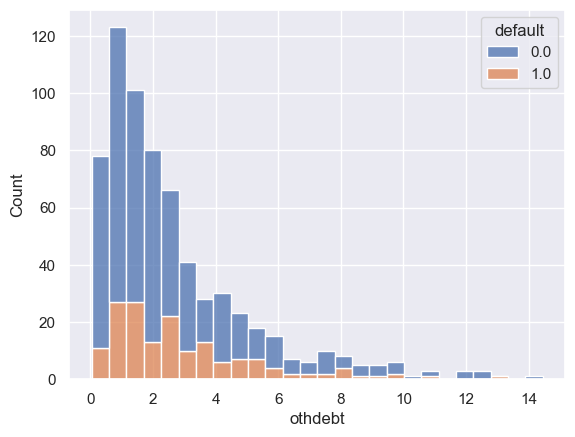

In [27]:
sns.histplot(data=data_clean2, x="othdebt", hue="default", multiple="stack")

#Train Test Split Method

In [28]:
X = data_clean2.drop('default', axis=1)
y = data_clean2['default']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

#Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 80.45 %


In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.5357142857142857
Precision Score :  0.6818181818181818
Recall Score :  0.4411764705882353


#Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [34]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 79.7 %


In [35]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.5573770491803278
Precision Score :  0.6296296296296297
Recall Score :  0.5


#K-Fold Cross Validation Method

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=5, random_state=0, shuffle=True)

In [37]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=0)
X_under, y_under = under.fit_resample(X_train, y_train)
y_under.value_counts()

0.0    129
1.0    129
Name: default, dtype: int64

#Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
scores = cross_val_score(rfc,X_under,y_under,cv = cv,scoring = 'accuracy')
print("Accuracy: ", round(np.mean(scores)*100 ,2), "%")

Accuracy:  75.57 %


In [39]:
rfc.fit(X_under, y_under)
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.5909090909090909
Precision Score :  0.48148148148148145
Recall Score :  0.7647058823529411


#Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
scores = cross_val_score(lr,X_under,y_under,cv = cv,scoring = 'accuracy')
print("Accuracy: ", round(np.mean(scores)*100 ,2), "%")

Accuracy:  76.36 %


In [41]:
lr.fit(X_under, y_under)
y_pred = lr.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.5842696629213483
Precision Score :  0.4727272727272727
Recall Score :  0.7647058823529411
